# Classification
This file includes code which classifies text chunks as (Austen, Shelly, Kafka, Tolstoy or Dostoyevsky).
The training data is text chunks from their respective works _Pride and predjudice_, _Frankenstein_, _The trial_, _Anna Karenina_ and _Crime and punishment_. We obtain the texts from the Gutenberg Project.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from textdataset import TextDataset
from neural_net import NeuralNet

Reading in the data

In [2]:
X = np.load('text_data.npy')
y = np.load('labels.npy')

In [7]:
# splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)

y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()

dataset_train = TextDataset(torch.tensor(X_train), y_train)
dataset_test = TextDataset(torch.tensor(X_test), y_test)

# splitting the data into batches
batch_size = 64
torch.manual_seed(1)
dl_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, drop_last=True)
dl_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True, drop_last=True)

# defining the model, optimizer and loss function
model = NeuralNet()

learning_rate = 0.0001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Training the model

In [4]:
def training_model(dataloader, model, loss_fn, optimizer, num_epochs=100):
    for epoch in range(num_epochs):
        # setting the model to train mode
        model.train()
        
        for (X, y) in dataloader:
            pred = model(X)
            loss = loss_fn(pred, y)

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()           # resets the gradients

        if epoch % 1 == 0:
            loss = loss.item()
            print(f"Epoch {epoch+1:>4f}      loss: {loss:>7f}")

In [9]:
training_model(dl_train, model, loss_fn, optimizer, num_epochs=10)

Epoch 1.000000      loss: 0.904842
Epoch 2.000000      loss: 0.904833
Epoch 3.000000      loss: 0.904843
Epoch 4.000000      loss: 0.904847
Epoch 5.000000      loss: 0.904854
Epoch 6.000000      loss: 0.904891
Epoch 7.000000      loss: 0.904862
Epoch 8.000000      loss: 0.904844
Epoch 9.000000      loss: 0.904926
Epoch 10.000000      loss: 0.904837


### Measuring performance on test dataset and creating confusion matrix

In [26]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode 
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    all_preds = []
    all_labels = []

    with torch.no_grad():           # gradient computation excluded, unnecessary
        for X, y in dataloader:
            pred = model(X)

            all_preds.extend(pred.argmax(1).tolist())
            all_labels.extend(y.tolist())

            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        test_loss /= num_batches
        correct /= size
        print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return all_preds, all_labels


predictions, labels = test_loop(dl_test, model, loss_fn)

# Compute and print confusion matrix
cm = confusion_matrix(labels, predictions)
print("Confusion Matrix:")
print(cm)

Test Error: 
 Accuracy: 96.6%, Avg loss: 0.912403 

Confusion Matrix:
[[156   1   0   0   0]
 [  1 259   0   2   0]
 [  0   0 207   0   0]
 [  1   0   0 261   1]
 [  0   0   0   2 261]]


c:\Users\maria\anaconda3\envs\FYS-STK3155\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


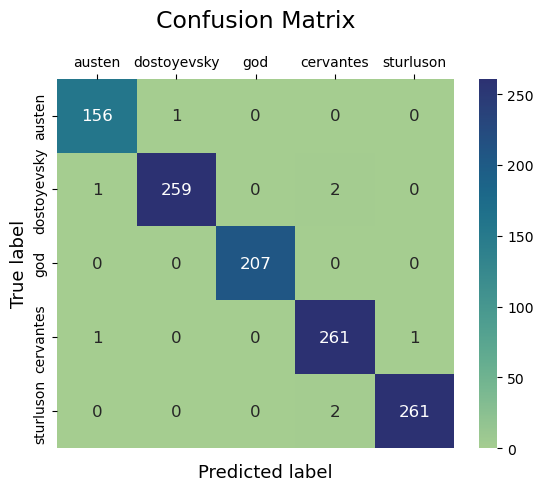

In [27]:
# Plotting the confusion matrix
ax = sns.heatmap(cm, 
            annot=True,
            annot_kws={"fontsize":12},
            fmt=".0f",
            xticklabels=['austen', 'dostoyevsky', 'god', 'cervantes', 'sturluson'],
            yticklabels=['austen', 'dostoyevsky', 'god', 'cervantes', 'sturluson'],
            cmap='crest')
plt.ylabel('True label', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20, loc='center')
ax.set(xlabel="", ylabel="True label")
ax.xaxis.tick_top()

plt.gca().figure.text(0.45, 0.05, 'Predicted label', ha='center', fontsize=13)
plt.show()

### Chunk size 50

Reading in the data

In [28]:
X = np.load('text_data50.npy')
y = np.load('labels50.npy')

In [29]:
# splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)

y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()

dataset_train = TextDataset(torch.tensor(X_train), y_train)
dataset_test = TextDataset(torch.tensor(X_test), y_test)

# splitting the data into batches
batch_size = 64
torch.manual_seed(1)
dl_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, drop_last=True)
dl_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True, drop_last=True)

# defining the model, optimizer and loss function
model = NeuralNet()

learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Training the model

In [31]:
training_model(dl_train, model, loss_fn, optimizer, num_epochs=1)

Epoch 1.000000      loss: 0.904879


In [32]:
predictions, labels = test_loop(dl_test, model, loss_fn)

# Compute and print confusion matrix
cm = confusion_matrix(labels, predictions)
print("Confusion Matrix:")
print(cm)

Test Error: 
 Accuracy: 93.7%, Avg loss: 0.958747 

Confusion Matrix:
[[447  26   0   9   0]
 [ 32 749   3  22   1]
 [  0   0 636   6   1]
 [ 14  45   3 718  12]
 [  1   5   2  10 778]]


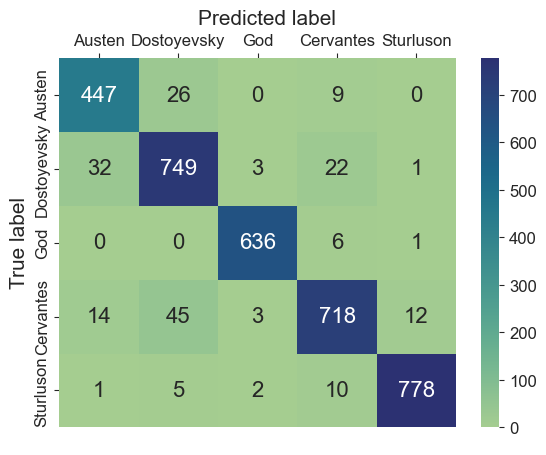

In [33]:
# plotting parameters
sns.set_style('whitegrid')
sns.set_palette('muted')
plt.rc('xtick', labelsize=12)  # Set x-tick label size
plt.rc('ytick', labelsize=12)  # Set y-tick label size

# Plotting the confusion matrix
ax = sns.heatmap(cm, 
            annot=True,
            annot_kws={"fontsize":16},
            fmt=".0f",
            xticklabels=['Austen', 'Dostoyevsky', 'God', 'Cervantes', 'Sturluson'],
            yticklabels=['Austen', 'Dostoyevsky', 'God', 'Cervantes', 'Sturluson'],
            cmap='crest')
plt.ylabel('True label', fontsize=15)
ax.set(xlabel=" ", ylabel="True label")
ax.xaxis.tick_top()
ax.yaxis.tick_left()

plt.gca().figure.text(0.45, 0.95, 'Predicted label', ha='center', fontsize=15)
plt.show()

### Scikit-learn wrapping using `skorch`

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from torch import nn
from skorch import NeuralNetClassifier

X, y = make_classification(1000, 20, n_informative=10, random_state=0)
X = X.astype(np.float32)
y = y.astype(np.int64)

net = NeuralNetClassifier(
    NeuralNet,
    max_epochs=10,
    lr=0.1,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)

net.fit(X, y)
y_proba = net.predict_proba(X)

In [ ]:
def training_model(dataloader, model, loss_fn, optimizer, num_epochs=100):
    for epoch in range(num_epochs):
        # setting the model to train mode
        model.train()
        
        for (X, y) in dataloader:
            pred = model(X)
            loss = loss_fn(pred, y)

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()           # resets the gradients

        if epoch % 1 == 0:
            loss = loss.item()
            print(f"Epoch {epoch+1:>4f}      loss: {loss:>7f}")

In [39]:
training_model(dataset_train, model, loss_fn, optimizer, num_epochs=1)

c:\Users\maria\anaconda3\envs\FYS-STK3155\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch 1.000000      loss: 0.904832


### Testing on other books by the same authors

In [50]:
X_austen = np.load('../Texts/sense_and_sensibility.npy')
X_dostoyevsky = np.load('../Texts/brother_karamazov.npy')
X_nt = np.load('../Texts/nt_god.npy')
y_austen = np.zeros(len(X_austen))
y_dostoyevsky = np.ones(len(X_dostoyevsky))
y_nt = np.full(len(X_nt), 2)                    # fills an array with that number

X_ad = np.concatenate((X_austen, X_dostoyevsky, X_nt))
y_ad = np.hstack((y_austen, y_dostoyevsky, y_nt))

y_ad = torch.from_numpy(y_ad).long()

dataset_ad = TextDataset(torch.tensor(X_ad), y_ad)

# splitting the data into batches
batch_size = 64
torch.manual_seed(1)
dl_ad = DataLoader(dataset_ad, batch_size=batch_size, shuffle=True, drop_last=True)

In [51]:
predictions, labels = test_loop(dl_ad, model, loss_fn)

# Compute and print confusion matrix
cm = confusion_matrix(labels, predictions)
print("Confusion Matrix:")
print(cm)

Test Error: 
 Accuracy: 97.1%, Avg loss: 0.931147 

Confusion Matrix:
[[ 772   14    0    2    2]
 [  12 2144   26  134   11]
 [   0    1 5435   18    5]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


c:\Users\maria\anaconda3\envs\FYS-STK3155\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


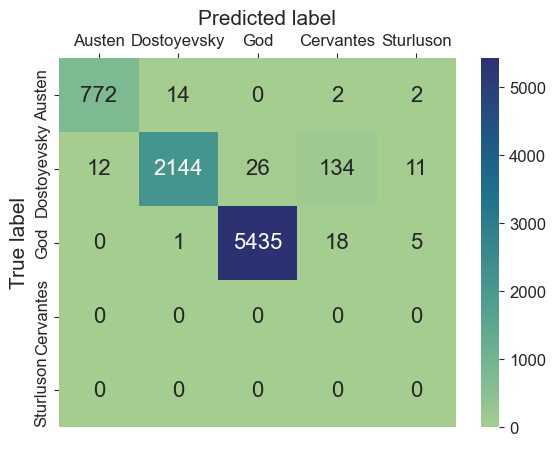

In [52]:
# plotting parameters
sns.set_style('whitegrid')
sns.set_palette('muted')
plt.rc('xtick', labelsize=12)  # Set x-tick label size
plt.rc('ytick', labelsize=12)  # Set y-tick label size

# Plotting the confusion matrix
ax = sns.heatmap(cm, 
            annot=True,
            annot_kws={"fontsize":16},
            fmt=".0f",
            xticklabels=['Austen', 'Dostoyevsky', 'God', 'Cervantes', 'Sturluson'],
            yticklabels=['Austen', 'Dostoyevsky', 'God', 'Cervantes', 'Sturluson'],
            cmap='crest')
plt.ylabel('True label', fontsize=15)
ax.set(xlabel=" ", ylabel="True label")
ax.xaxis.tick_top()
ax.yaxis.tick_left()

plt.gca().figure.text(0.45, 0.95, 'Predicted label', ha='center', fontsize=15)
plt.show()

### Different author fronm training material

In [53]:
X_wells = np.load('../Texts/wells.npy')
y_wells = np.zeros(len(X_wells))                # have to set the label to something

y_wells = torch.from_numpy(y_wells).long()

dataset_wells = TextDataset(torch.tensor(X_wells), y_wells)

# splitting the data into batches
batch_size = 64
torch.manual_seed(1)
dl_wells = DataLoader(dataset_wells, batch_size=batch_size, shuffle=True, drop_last=True)

predictions, labels = test_loop(dl_wells, model, loss_fn)

# Compute and print confusion matrix
cm = confusion_matrix(labels, predictions)
print("Confusion Matrix:")
print(cm)

Test Error: 
 Accuracy: 0.0%, Avg loss: 1.902482 

Confusion Matrix:
[[  0 185   5   2]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]


c:\Users\maria\anaconda3\envs\FYS-STK3155\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


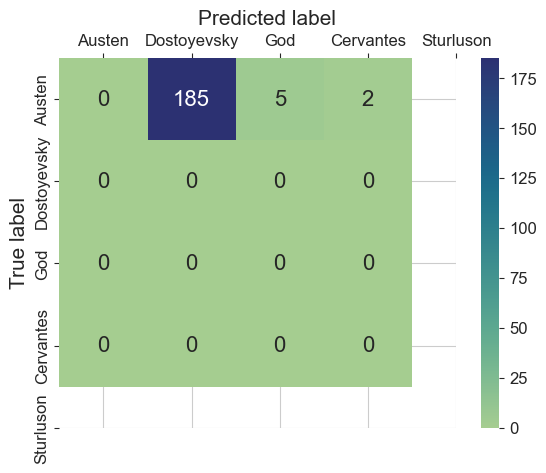

In [54]:
# plotting parameters
sns.set_style('whitegrid')
sns.set_palette('muted')
plt.rc('xtick', labelsize=12)  # Set x-tick label size
plt.rc('ytick', labelsize=12)  # Set y-tick label size

# Plotting the confusion matrix
ax = sns.heatmap(cm, 
            annot=True,
            annot_kws={"fontsize":16},
            fmt=".0f",
            xticklabels=['Austen', 'Dostoyevsky', 'God', 'Cervantes', 'Sturluson'],
            yticklabels=['Austen', 'Dostoyevsky', 'God', 'Cervantes', 'Sturluson'],
            cmap='crest')
plt.ylabel('True label', fontsize=15)
ax.set(xlabel=" ", ylabel="True label")
ax.xaxis.tick_top()
ax.yaxis.tick_left()

plt.gca().figure.text(0.45, 0.95, 'Predicted label', ha='center', fontsize=15)
plt.show()